In [70]:
#!pip3 install pathlib --user
from pathlib import Path
pathFiles=Path("/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/TIMSTOF/LARS/2023/230504_hela_test/DIAsagaRes/mqparTTPdia.xml.1699540930.results/")
print(list(pathFiles.iterdir()))

[PosixPath('/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/TIMSTOF/LARS/2023/230504_hela_test/DIAsagaRes/mqparTTPdia.xml.1699540930.results/230502_helaDIA_Slot1-54_1_4417'), PosixPath('/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/TIMSTOF/LARS/2023/230504_hela_test/DIAsagaRes/mqparTTPdia.xml.1699540930.results/230502_helaDIA_0p01_Slot1-20_1_4413'), PosixPath('/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/TIMSTOF/LARS/2023/230504_hela_test/DIAsagaRes/mqparTTPdia.xml.1699540930.results/230502_helaDIA_0p001_Slot1-21_1_4411'), PosixPath('/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/TIMSTOF/LARS/2023/230504_hela_test/DIAsagaRes/mqparTTPdia.xml.1699540930.results/230502_helaDIA_0p1_Slot1-19_1_4415'), PosixPath('/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/TIMSTOF/LARS/2023/230504_hela_test/DIAsagaRes/mqparTTPdia.xml.1699540930.results/proteinGroups.txtIntensityCombo.csv')]


In [71]:
fileName='proteinGroups.txt'
trainList=list(pathFiles.rglob(fileName))
print(trainList)

[PosixPath('/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/TIMSTOF/LARS/2023/230504_hela_test/DIAsagaRes/mqparTTPdia.xml.1699540930.results/230502_helaDIA_Slot1-54_1_4417/combined/txt/proteinGroups.txt'), PosixPath('/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/TIMSTOF/LARS/2023/230504_hela_test/DIAsagaRes/mqparTTPdia.xml.1699540930.results/230502_helaDIA_0p01_Slot1-20_1_4413/combined/txt/proteinGroups.txt'), PosixPath('/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/TIMSTOF/LARS/2023/230504_hela_test/DIAsagaRes/mqparTTPdia.xml.1699540930.results/230502_helaDIA_0p001_Slot1-21_1_4411/combined/txt/proteinGroups.txt'), PosixPath('/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/TIMSTOF/LARS/2023/230504_hela_test/DIAsagaRes/mqparTTPdia.xml.1699540930.results/230502_helaDIA_0p1_Slot1-19_1_4415/combined/txt/proteinGroups.txt')]


In [72]:
#!pip3 install pandas --user
import pandas as pd
df=pd.DataFrame()
valC='Intensity'
#valC='Score'
for f in trainList:
    if Path(f).stat().st_size > 0:
        proteinHits=pd.read_csv(f,low_memory=False,sep='\t')
        print(f.parts[-4])
        proteinHits.rename({'Protein IDs':'ID'},inplace=True,axis='columns')
        proteinHits=proteinHits.ID.str.split(';', expand=True).set_index(proteinHits[valC]).stack().reset_index(level=0, name='ID')
        proteinHits['Name']=f.parts[-4]
        df=pd.concat([df,proteinHits],sort=False)
print(df.columns)
print(df.head())
df.to_csv(pathFiles.with_suffix('.combined.csv'))         

230502_helaDIA_Slot1-54_1_4417
230502_helaDIA_0p01_Slot1-20_1_4413
230502_helaDIA_0p001_Slot1-21_1_4411
230502_helaDIA_0p1_Slot1-19_1_4415
Index(['Intensity', 'ID', 'Name'], dtype='object')
   Intensity          ID                            Name
0  3461600.0  A0A024QZP7  230502_helaDIA_Slot1-54_1_4417
1  3461600.0      P06493  230502_helaDIA_Slot1-54_1_4417
2  3461600.0    P06493-2  230502_helaDIA_Slot1-54_1_4417
3  3461600.0      E5RIU6  230502_helaDIA_Slot1-54_1_4417
0  7294600.0  A0A024QZX5  230502_helaDIA_Slot1-54_1_4417


In [73]:
dfp=df.pivot(index='ID', columns='Name', values=valC)
dfp.to_csv(pathFiles.with_suffix('.'+valC+'.csv'))
print(dfp.head())
print(dfp.columns)

Name        230502_helaDIA_0p001_Slot1-21_1_4411  \
ID                                                 
A0A024QZ42                                   NaN   
A0A024QZP7                                   NaN   
A0A024QZX5                                   NaN   
A0A024R161                                   NaN   
A0A024R1R8                                   NaN   

Name        230502_helaDIA_0p01_Slot1-20_1_4413  \
ID                                                
A0A024QZ42                                  NaN   
A0A024QZP7                                  NaN   
A0A024QZX5                                  NaN   
A0A024R161                                  NaN   
A0A024R1R8                              18597.0   

Name        230502_helaDIA_0p1_Slot1-19_1_4415  230502_helaDIA_Slot1-54_1_4417  
ID                                                                              
A0A024QZ42                            819590.0                       3467100.0  
A0A024QZP7                        

array([[<Axes: title={'center': '230502_helaDIA_0p001_Slot1-21_1_4411'}>,
        <Axes: title={'center': '230502_helaDIA_0p01_Slot1-20_1_4413'}>],
       [<Axes: title={'center': '230502_helaDIA_0p1_Slot1-19_1_4415'}>,
        <Axes: title={'center': '230502_helaDIA_Slot1-54_1_4417'}>]],
      dtype=object)

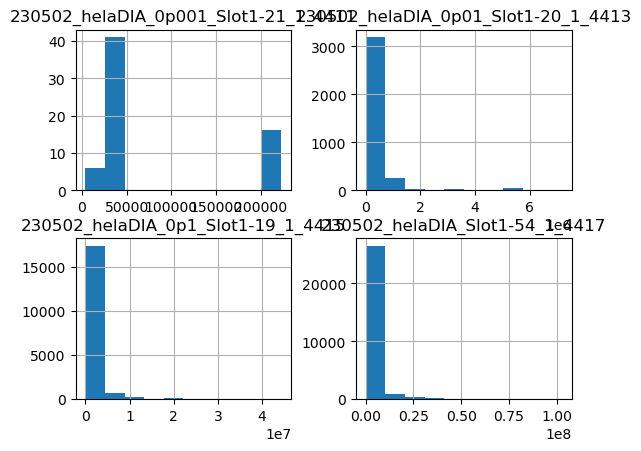

In [74]:
dfp.hist()

In [75]:
dfp['Sum']=dfp.sum(axis=1)
dfp=dfp.sort_values('Sum',ascending=False)
writeScores=pathFiles/(fileName+valC+"Combo.csv")
dfp.to_csv(writeScores)#.with_suffix('.combo.csv'))
print(valC,"written in",writeScores)

Intensity written in /mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/TIMSTOF/LARS/2023/230504_hela_test/DIAsagaRes/mqparTTPdia.xml.1699540930.results/proteinGroups.txtIntensityCombo.csv


<Axes: xlabel='ID'>

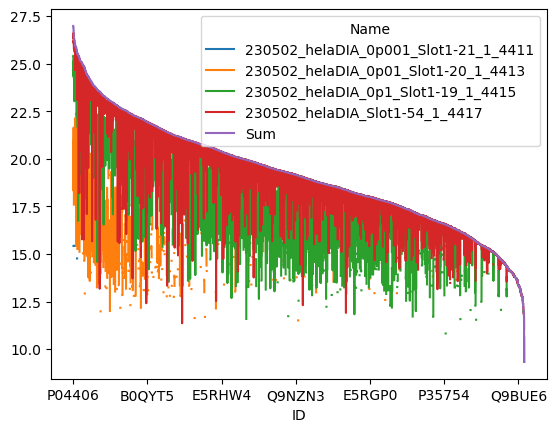

In [76]:
import numpy as np
log2dfp=np.log2(dfp)
writeScores=pathFiles/(fileName+valC+"log2Combo.csv")
log2dfp.plot()

array([[<Axes: title={'center': '230502_helaDIA_0p001_Slot1-21_1_4411'}>,
        <Axes: title={'center': '230502_helaDIA_0p01_Slot1-20_1_4413'}>],
       [<Axes: title={'center': '230502_helaDIA_0p1_Slot1-19_1_4415'}>,
        <Axes: title={'center': '230502_helaDIA_Slot1-54_1_4417'}>],
       [<Axes: title={'center': 'Sum'}>, <Axes: >]], dtype=object)

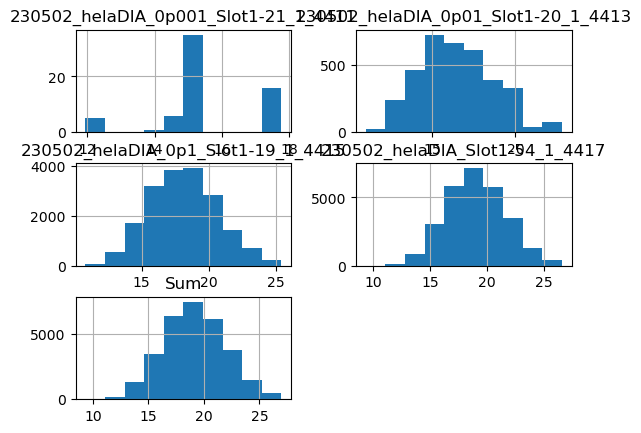

In [77]:

log2dfp.hist()


In [78]:
pathFiles2=Path("/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/TIMSTOF/LARS/2023/230504_hela_test/DDAsagaRes/mqparTTPdda.xml.1699892695.results/")
print(list(pathFiles2.iterdir()))

[PosixPath('/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/TIMSTOF/LARS/2023/230504_hela_test/DDAsagaRes/mqparTTPdda.xml.1699892695.results/230502_helaDIA_Slot1-54_1_4417'), PosixPath('/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/TIMSTOF/LARS/2023/230504_hela_test/DDAsagaRes/mqparTTPdda.xml.1699892695.results/230502_hela_0p001_Slot1-21_1_4401'), PosixPath('/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/TIMSTOF/LARS/2023/230504_hela_test/DDAsagaRes/mqparTTPdda.xml.1699892695.results/230502_helaDIA_0p01_Slot1-20_1_4413'), PosixPath('/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/TIMSTOF/LARS/2023/230504_hela_test/DDAsagaRes/mqparTTPdda.xml.1699892695.results/230502_hela_0p01_Slot1-20_1_4403'), PosixPath('/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/TIMSTOF/LARS/2023/230504_hela_test/DDAsagaRes/mqparTTPdda.xml.1699892695.results/230502_hela_0p1_Slot1-19_1_4405'), PosixPath('/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/p

In [83]:
trainList2=list(pathFiles2.rglob(fileName))
print(trainList2)

[PosixPath('/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/TIMSTOF/LARS/2023/230504_hela_test/DDAsagaRes/mqparTTPdda.xml.1699892695.results/230502_hela_0p001_Slot1-21_1_4401/combined/txt/proteinGroups.txt'), PosixPath('/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/TIMSTOF/LARS/2023/230504_hela_test/DDAsagaRes/mqparTTPdda.xml.1699892695.results/230502_hela_0p01_Slot1-20_1_4403/combined/txt/proteinGroups.txt'), PosixPath('/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/TIMSTOF/LARS/2023/230504_hela_test/DDAsagaRes/mqparTTPdda.xml.1699892695.results/230502_hela_0p1_Slot1-19_1_4405/combined/txt/proteinGroups.txt'), PosixPath('/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/TIMSTOF/LARS/2023/230504_hela_test/DDAsagaRes/mqparTTPdda.xml.1699892695.results/230502_hela_Slot1-54_1_4407/combined/txt/proteinGroups.txt')]


In [92]:
#!pip3 install pandas --user
import pandas as pd
df2=pd.DataFrame()
for f in trainList2:
    if Path(f).stat().st_size > 0:
        proteinHits=pd.read_csv(f,low_memory=False,sep='\t')
        print(f.parts[-4])
        proteinHits.rename({'Protein IDs':'ID'},inplace=True,axis='columns')
        proteinHits=proteinHits.ID.str.split(';', expand=True).set_index(proteinHits[valC]).stack().reset_index(level=0, name='ID')
        proteinHits['Name']=f.parts[-4]
        df2=pd.concat([df2,proteinHits],sort=False)
print(df2.columns)
print(df2.head())
df2.to_csv(pathFiles.with_suffix('.combined.csv'))         

230502_hela_0p001_Slot1-21_1_4401
230502_hela_0p01_Slot1-20_1_4403
230502_hela_0p1_Slot1-19_1_4405
230502_hela_Slot1-54_1_4407
Index(['Intensity', 'ID', 'Name'], dtype='object')
   Intensity          ID                               Name
0     9887.2  A0A7I2V4S4  230502_hela_0p001_Slot1-21_1_4401
1     9887.2  A0A7I2V4N1  230502_hela_0p001_Slot1-21_1_4401
2     9887.2  A0A024RA28  230502_hela_0p001_Slot1-21_1_4401
3     9887.2  A0A7I2V3P1  230502_hela_0p001_Slot1-21_1_4401
4     9887.2  A0A7I2V3P7  230502_hela_0p001_Slot1-21_1_4401


In [93]:
dfp2=df2.pivot(index='ID', columns='Name', values=valC)
dfp2.to_csv(pathFiles2.with_suffix('.'+valC+'.csv'))
print(dfp2.head())
print(dfp2.columns)

Name        230502_hela_0p001_Slot1-21_1_4401  \
ID                                              
A0A024QZ33                                NaN   
A0A024QZ42                                NaN   
A0A024QZP7                                NaN   
A0A024QZX5                                NaN   
A0A024R161                                NaN   

Name        230502_hela_0p01_Slot1-20_1_4403  230502_hela_0p1_Slot1-19_1_4405  \
ID                                                                              
A0A024QZ33                               NaN                              NaN   
A0A024QZ42                               NaN                         615060.0   
A0A024QZP7                               NaN                         358960.0   
A0A024QZX5                           65273.0                        1542700.0   
A0A024R161                               NaN                              NaN   

Name        230502_hela_Slot1-54_1_4407  
ID                                       
A0A0

array([[<Axes: title={'center': '230502_hela_0p001_Slot1-21_1_4401'}>,
        <Axes: title={'center': '230502_hela_0p01_Slot1-20_1_4403'}>],
       [<Axes: title={'center': '230502_hela_0p1_Slot1-19_1_4405'}>,
        <Axes: title={'center': '230502_hela_Slot1-54_1_4407'}>]],
      dtype=object)

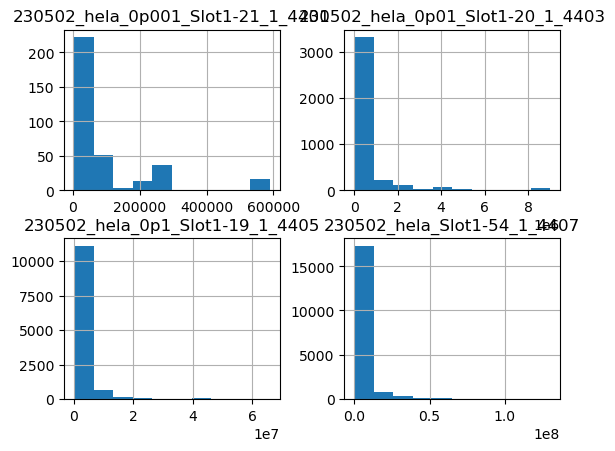

In [94]:
dfp2.hist()

In [95]:
dfp2['Sum']=dfp2.sum(axis=1)
dfp2=dfp2.sort_values('Sum',ascending=False)
writeScores=pathFiles2/(fileName+valC+"Combo.csv")
dfp2.to_csv(writeScores)#.with_suffix('.combo.csv'))
print(valC,"written in",writeScores)

Intensity written in /mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/TIMSTOF/LARS/2023/230504_hela_test/DDAsagaRes/mqparTTPdda.xml.1699892695.results/proteinGroups.txtIntensityCombo.csv


<Axes: xlabel='ID'>

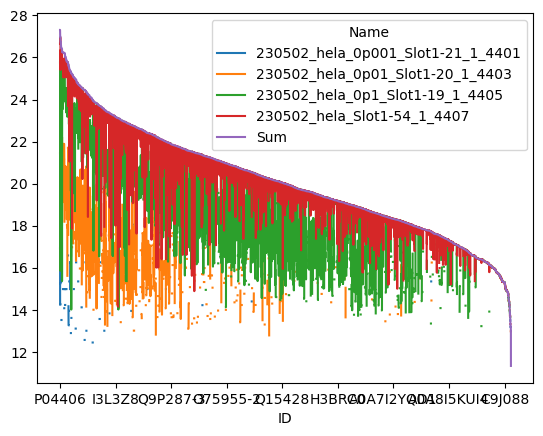

In [96]:
import numpy as np
log2dfp2=np.log2(dfp2)
writeScores=pathFiles2/(fileName+valC+"log2Combo.csv")
log2dfp2.plot()

array([[<Axes: title={'center': '230502_hela_0p001_Slot1-21_1_4401'}>,
        <Axes: title={'center': '230502_hela_0p01_Slot1-20_1_4403'}>],
       [<Axes: title={'center': '230502_hela_0p1_Slot1-19_1_4405'}>,
        <Axes: title={'center': '230502_hela_Slot1-54_1_4407'}>],
       [<Axes: title={'center': 'Sum'}>, <Axes: >]], dtype=object)

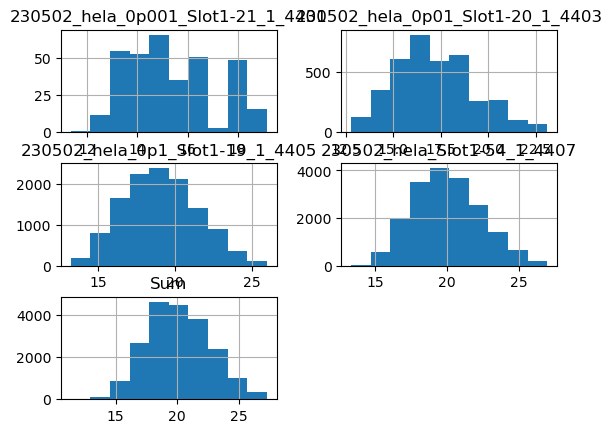

In [98]:

log2dfp2.hist()

In [99]:
from os import listdir
filepaths = [f for f in trainList]
import pandas as pd
dfT = pd.concat(map(pd.read_table, filepaths))
print(dfT.head())
print(dfT.columns)
dfT.to_csv(pathFiles.with_suffix('.combinedT.txt'),sep="\t")#,rownames=FALSE)

                                         Protein IDs  \
0                  A0A024QZP7;P06493;P06493-2;E5RIU6   
1  A0A024QZX5;A0A087X1N8;P35237;A0A2R8YD12;A0A2R8...   
2                         A0A024R161;Q9H1X3-3;P50151   
3                                  A0A024R1R8;Q9Y2S6   
4  A0A024R3M2;A0A2R8Y5X2;A0A1B0GWG7;A0A1B0GUD6;Q3...   

                                Majority protein IDs Peptide counts (all)  \
0                  A0A024QZP7;P06493;P06493-2;E5RIU6              9;9;8;6   
1  A0A024QZX5;A0A087X1N8;P35237;A0A2R8YD12;A0A2R8...    15;15;15;14;8;1;1   
2                         A0A024R161;Q9H1X3-3;P50151                1;1;1   
3                                  A0A024R1R8;Q9Y2S6                  1;1   
4  A0A024R3M2;A0A2R8Y5X2;A0A1B0GWG7;A0A1B0GUD6;Q3...      1;1;1;1;1;1;1;1   

  Peptide counts (razor+unique) Peptide counts (unique)  \
0                       9;9;8;6                 8;8;7;5   
1             15;15;15;14;8;1;1       14;14;14;13;7;1;1   
2                      

In [102]:
dfT['Protein IDs'].str.split(';',expand=True).stack().head()

0  0    A0A024QZP7
   1        P06493
   2      P06493-2
   3        E5RIU6
1  0    A0A024QZX5
dtype: object

In [101]:
dfTc=df.assign(Uniprot=df['Protein IDs'].str.split(';')).explode('Uniprot')
dfTc.to_csv(pathFiles.with_suffix('.combinedTc.csv'))

KeyError: 'Protein IDs'

In [54]:
dfTc.Uniprot

0                                            CON__P00761
1                                            CON__P48668
1                                            CON__P35908
1                                          CON__P35908v2
1      sp|P35908|K22E_HUMANKeratin,typeIIcytoskeletal...
                             ...                        
644    sp|O75369-2|FLNB_HUMANIsoform2ofFilamin-BOS=Ho...
644    sp|O75369-9|FLNB_HUMANIsoform9ofFilamin-BOS=Ho...
644    sp|O75369|FLNB_HUMANFilamin-BOS=HomosapiensOX=...
644    sp|O75369-8|FLNB_HUMANIsoform8ofFilamin-BOS=Ho...
644    tr|H7C2E7|H7C2E7_HUMANFilamin-A(Fragment)OS=Ho...
Name: Uniprot, Length: 18352, dtype: object

In [53]:
dfTS=dfTc[dfTc['Uniprot'].str.contains("CON")]
dfTS

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,Potential contaminant,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Name,Uniprot
0,CON__P00761,CON__P00761,2,2,2,NaN,1,2,2,2,...,+,0,39;62,True;True,39;62,260;481;482,591;994;995;996;997;998;999,591;994,/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/...,CON__P00761
1,CON__P48668;CON__P35908;CON__P35908v2;sp|P3590...,CON__P48668;CON__P35908;CON__P35908v2;sp|P3590...,3;3;3;3;3;3;3;3;3;2;2;2;2;2;2;2;2;1;1;1;1;1;1;...,3;3;3;3;3;3;3;3;3;2;2;2;2;2;2;2;2;1;1;1;1;1;1;...,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;0;0;0;0;0;0;0;...,";;;sp|P35908|K22E_HUMAN Keratin, type II cytos...",55,3,3,1,...,+,1,6;15;44,True;True;True,6;15;44,14;41;408,18;121;833,18;121;833,/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/...,CON__P48668
1,CON__P48668;CON__P35908;CON__P35908v2;sp|P3590...,CON__P48668;CON__P35908;CON__P35908v2;sp|P3590...,3;3;3;3;3;3;3;3;3;2;2;2;2;2;2;2;2;1;1;1;1;1;1;...,3;3;3;3;3;3;3;3;3;2;2;2;2;2;2;2;2;1;1;1;1;1;1;...,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;0;0;0;0;0;0;0;...,";;;sp|P35908|K22E_HUMAN Keratin, type II cytos...",55,3,3,1,...,+,1,6;15;44,True;True;True,6;15;44,14;41;408,18;121;833,18;121;833,/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/...,CON__P35908
1,CON__P48668;CON__P35908;CON__P35908v2;sp|P3590...,CON__P48668;CON__P35908;CON__P35908v2;sp|P3590...,3;3;3;3;3;3;3;3;3;2;2;2;2;2;2;2;2;1;1;1;1;1;1;...,3;3;3;3;3;3;3;3;3;2;2;2;2;2;2;2;2;1;1;1;1;1;1;...,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;0;0;0;0;0;0;0;...,";;;sp|P35908|K22E_HUMAN Keratin, type II cytos...",55,3,3,1,...,+,1,6;15;44,True;True;True,6;15;44,14;41;408,18;121;833,18;121;833,/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/...,CON__P35908v2
1,CON__P48668;CON__P35908;CON__P35908v2;sp|P3590...,CON__P48668;CON__P35908;CON__P35908v2;sp|P3590...,3;3;3;3;3;3;3;3;3;2;2;2;2;2;2;2;2;1;1;1;1;1;1;...,3;3;3;3;3;3;3;3;3;2;2;2;2;2;2;2;2;1;1;1;1;1;1;...,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;0;0;0;0;0;0;0;...,";;;sp|P35908|K22E_HUMAN Keratin, type II cytos...",55,3,3,1,...,+,1,6;15;44,True;True;True,6;15;44,14;41;408,18;121;833,18;121;833,/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/...,CON__P02538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,CON__REFSEQ:XP_585019,CON__REFSEQ:XP_585019,1,1,1,NaN,1,1,1,1,...,+,46,1281,True,1281,1768,2227,2227,/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/...,CON__REFSEQ:XP_585019
148,sp|P07737|PROF1_HUMANProfilin-1OS=HomosapiensO...,sp|P07737|PROF1_HUMANProfilin-1OS=HomosapiensO...,7;5;3;2,7;5;3;2,7;5;3;2,sp|P07737|PROF1_HUMAN Profilin-1 OS=Homo sapie...,4,7,7,7,...,NaN,148,224;225;1394;1405;1437;1448;1484,True;True;True;True;True;True;True,224;225;1394;1405;1437;1448;1484,291;292;293;1926;1938;1975;1988;2032,370;371;372;2411;2423;2463;2477;2524,370;371;2411;2423;2463;2477;2524,/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/...,CON__P02584
290,"sp|P35527|K1C9_HUMANKeratin,typeIcytoskeletal9...","sp|P35527|K1C9_HUMANKeratin,typeIcytoskeletal9...",2;1;1,2;1;1,2;1;1,"sp|P35527|K1C9_HUMAN Keratin, type I cytoskele...",3,2,2,2,...,+,290,422;474,True;True,422;474,531;587,629;688,629;688,/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/...,CON__P35527
440,sp|P63313|TYB10_HUMANThymosinbeta-10OS=Homosap...,sp|P63313|TYB10_HUMANThymosinbeta-10OS=Homosap...,2;1,2;1,2;1,sp|P63313|TYB10_HUMAN Thymosin beta-10 OS=Homo...,2,2,2,2,...,+,440,1205;1206,True;True,1205;1206,1662;1663;1664;1665;1666,2103;2104;2105;2106;2107;2108;2109;2110,2103;2108,/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/...,CON__P21752


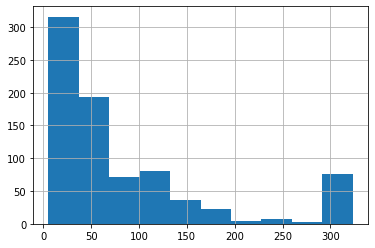

In [55]:
dfTS.Score.hist()

In [56]:
dfTS['Name']

0      /mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/...
1      /mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/...
1      /mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/...
1      /mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/...
1      /mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/...
                             ...                        
46     /mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/...
148    /mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/...
290    /mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/...
440    /mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/...
587    /mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/...
Name: Name, Length: 811, dtype: object

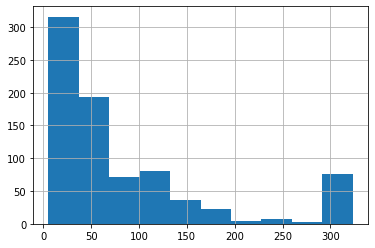

In [52]:
dfTS.Score.hist()

In [149]:
#filepaths = [f for f in trainList]
import pandas as pd
#dfT = pd.concat(map(pd.read_table, trainList))
#dfT = pd.concat(map(pd.read_table, trainList).set_index('Protein IDs'), axis=1, join='inner')
#dfT = pd.merge(map(pd.read_table, trainList), on='Protein IDs')#, how='inner')#, suffixes=('_1', '_2'))
cName='Protein IDs'
dfT=pd.DataFrame(columns=[cName])
for f in trainList:
    print(f)
    if Path(f).stat().st_size > 0:
        proteinHits=pd.read_csv(f,low_memory=False,sep='\t')
        #print(proteinHits[cName])
        #dfT=pd.concat([dfT.set_index(cName),proteinHits.set_index(cName)], axis=1, join='outer').reset_index()#merge(proteinHits, how='right')#, suffixes=('_1', '_2'))
        dfT=dfT.merge(proteinHits,left_on=cName, right_on=cName,how='outer',suffixes=('_left', f))
        print(dfT.columns)
dfT.to_csv(pathFiles.with_suffix('.combinedfT.txt'),sep="\t")#,rownames=FALSE)

/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/Animesh/notebooks/git/mqpar.xml.1616928725.results/210317_Ingrid5/combined/txt/proteinGroups.txt
Index(['Protein IDs', 'Majority protein IDs', 'Peptide counts (all)',
       'Peptide counts (razor+unique)', 'Peptide counts (unique)',
       'Fasta headers', 'Number of proteins', 'Peptides',
       'Razor + unique peptides', 'Unique peptides', 'Sequence coverage [%]',
       'Unique + razor sequence coverage [%]', 'Unique sequence coverage [%]',
       'Mol. weight [kDa]', 'Sequence length', 'Sequence lengths', 'Q-value',
       'Score', 'Intensity', 'MS/MS count', 'Only identified by site',
       'Reverse', 'Potential contaminant', 'id', 'Peptide IDs',
       'Peptide is razor', 'Mod. peptide IDs', 'Evidence IDs', 'MS/MS IDs',
       'Best MS/MS'],
      dtype='object')
/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/Animesh/notebooks/git/mqpar.xml.1616928725.results/210317_Ingrid8/combined/txt/proteinGroups.txt
I

In [150]:
#filepaths = [f for f in trainList]
import pandas as pd
cName='Protein IDs'
vName='Score'
dfT=pd.DataFrame(columns=[cName])
dfT.set_index(cName)
for f in trainList:
    print(f)
    if Path(f).stat().st_size > 0:
        proteinHits=pd.read_csv(f,low_memory=False,sep='\t')
        proteinHits=proteinHits.set_index(cName)
        proteinHits=proteinHits[vName]
        print(proteinHits.head())
        dfT=pd.concat([dfT.set_index(cName),proteinHits], axis=1)#.reset_index()
        #print(dfT.columns)
#dfT.to_csv(pathFiles.with_suffix('.combinedfT.txt'),sep="\t")#,rownames=FALSE)

/mnt/promec-ns9036k/NORSTORE_OSL_DISK/NS9036K/promec/promec/Animesh/notebooks/git/mqpar.xml.1616928725.results/210317_Ingrid5/combined/txt/proteinGroups.txt
Protein IDs
CON__ENSEMBL:ENSBTAP00000024146;sp|P20742-2|PZP_HUMANIsoform2ofPregnancyzoneproteinOS=HomosapiensOX=9606GN=PZP;sp|P01023|A2MG_HUMANAlpha-2-macroglobulinOS=HomosapiensOX=9606GN=A2MPE=1SV=3;sp|P20742|PZP_HUMANPregnancyzoneproteinOS=HomosapiensOX=9606GN=PZPPE=1SV=4                                                                                                                                                                                                                                                                                                                                                                                            149.7500
CON__Q9R0H5;CON__Q6NXH9;CON__Q6IFZ6;sp|Q7Z794|K2C1B_HUMANKeratin,typeIIcytoskeletal1bOS=HomosapiensOX=9606GN=KRT77PE=1SV=3;CON__Q7Z794;CON__ENSEMBL:ENSBTAP00000038253;sp|P35908|K22

KeyError: "None of ['Protein IDs'] are in the columns"

(array([4.4600e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        2.0560e+03, 1.0932e+04, 4.1520e+03, 6.5400e+02, 1.1000e+02]),
 array([ 0.        ,  3.90239025,  7.80478049, 11.70717074, 15.60956099,
        19.51195123, 23.41434148, 27.31673173, 31.21912197, 35.12151222,
        39.02390247]),
 <a list of 10 Patch objects>)

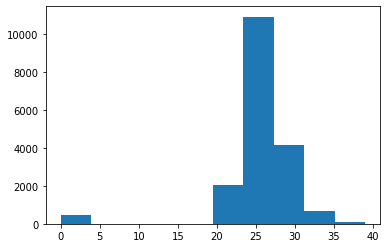

In [58]:
import matplotlib.pyplot as plt
import numpy as np
#df[df['protein'].str.contains("DECOY")].xcorr.hist()
plt.hist(np.log2(dfTc['Intensity']+1))

(array([4393., 2173., 2301., 2057., 1512., 1533., 1195.,  883.,  599.,
        1706.]),
 array([2.68535712, 3.25094438, 3.81653164, 4.3821189 , 4.94770615,
        5.51329341, 6.07888067, 6.64446793, 7.21005518, 7.77564244,
        8.3412297 ]),
 <a list of 10 Patch objects>)

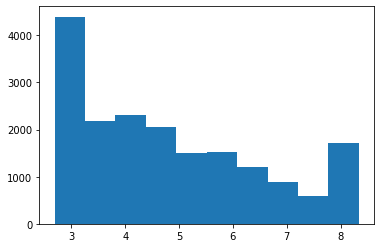

In [59]:
plt.hist(np.log2(dfTc['Score']+1))

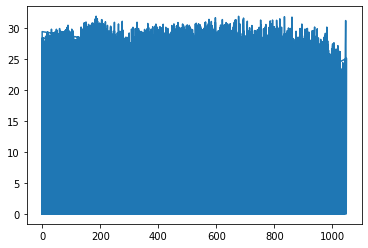

In [32]:
(np.log2(df['Intensity']+1)).plot()

In [65]:
#dfTc.Name
dfN=pd.pivot_table(dfTc,index=['Uniprot'])

In [66]:
dfN.Score

Uniprot
CON__A2A4G1                                                                                                97.200443
CON__A2A5Y0                                                                                               118.744500
CON__A2AB72                                                                                               118.744500
CON__A2I7N0                                                                                                 6.229450
CON__A2I7N1                                                                                                 6.229450
                                                                                                             ...    
tr|X6R3P0|X6R3P0_HUMANSlithomolog2proteinOS=HomosapiensOX=9606GN=SLIT2PE=1SV=1                              5.797800
tr|X6R6Z1|X6R6Z1_HUMANInterleukinenhancer-bindingfactor2(Fragment)OS=HomosapiensOX=9606GN=ILF2PE=1SV=1     41.770000
tr|X6RJP6|X6RJP6_HUMANTransgelin-2(Fragment)OS=Homosapie

In [33]:
dfP02769=df[df['Protein IDs'].str.contains('CON')]
dfP02769.head(5)

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,Reverse,Potential contaminant,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Name
35,CON__P02535-1;CON__P13645,CON__P02535-1;CON__P13645,1;1,1;1,1;1,;,2,1,1,1,...,NaN,+,35,1445,True,1445,1608,2466,2466,/home/ash022/notebooks/git/mqpar.xml.160612953...
36,CON__P35908v2;CON__P35908,CON__P35908v2;CON__P35908,1;1,1;1,1;1,;,2,1,1,1,...,NaN,+,36,1786,True,1786,1986,3108,3108,/home/ash022/notebooks/git/mqpar.xml.160612953...
37,CON__Q14CN4-1,CON__Q14CN4-1,1,1,1,NaN,1,1,1,1,...,NaN,+,37,1590,True,1590,1770,2743,2743,/home/ash022/notebooks/git/mqpar.xml.160612953...
34,CON__P04264;CON__Q8BGZ7;CON__P50446;CON__Q922U...,CON__P04264,4;1;1;1;1,4;1;1;1;1,4;1;1;1;1,NaN,5,4,4,4,...,NaN,+,34,1498;1638;1774;1805,True;True;True;True,1498;1638;1774;1805,1670;1822;1966;1999,2573;2819;3064;3117,2573;2819;3064;3117,/home/ash022/notebooks/git/mqpar.xml.160612953...
35,CON__P35527,CON__P35527,1,1,1,NaN,1,1,1,1,...,NaN,+,35,2029,True,2029,2246,3509,3509,/home/ash022/notebooks/git/mqpar.xml.160612953...


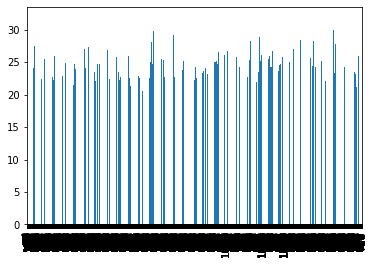

In [34]:
(np.log2(df['Intensity']+1)).plot(kind='bar',stacked=True)

In [47]:
fileName='allPeptides.txt'
trainList=list(pathFiles.rglob(fileName))
import pandas as pd
import matplotlib.pyplot as plt
dfP=pd.DataFrame()
for f in trainList:
    peptideHits=pd.read_csv(f,low_memory=False,sep='\t')
    print(f)
    peptideHits['Name']=f
    dfP=pd.concat([dfP,peptideHits],sort=False)
print(dfP.head())
print(dfP.columns)

/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140605_Pseudomonas_W2_K0K6_T2/combined/txt/allPeptides.txt
/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140605_Pseudomonas_S4_K0K6/combined/txt/allPeptides.txt
/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140605_Pseudomonas_O3_K0K6_T2/combined/txt/allPeptides.txt
/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140616_Pseudomonas_O3_K0K6_B2_T2/combined/txt/allPeptides.txt
/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140605_Pseudomonas_S3_K0K6_T2/combined/txt/allPeptides.txt
/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140616_Pseudomonas_S1_K0K6_B2/combined/txt/allPeptides.txt
/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140616_Pseudomonas_S3_K0K6_B2_T2/combined/txt/allPeptides.txt
/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140616_Pseudomonas_S1_K0K6_B2_T2/combined/txt/allPeptides.txt
/home/ash022/notebooks/git/mqpar.xml.1606129538.results/140605_Pseudomonas

In [48]:
#print(df.columns.get_loc("DP Proteins"))
dfDP=dfP.loc[:, dfP.columns.str.startswith('DP')|dfP.columns.str.startswith('Raw')]
dfDP=dfDP[dfDP['DP Proteins'].notnull()]

dfDP=dfDP.rename(columns = lambda x : str(x)[3:])
writeDPcsv=pathFiles/(fileName+"DP.csv")
print("writing output to ... ")
dfDP.to_csv(writeDPcsv)

#import pandas_profiling
#print(dfDP.profile_report())

print(writeDPcsv)
dfDPcnt=dfDP['Modification'].value_counts()
#https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
#dfDP['Base Raw File'].value_counts().plot(kind='bar',stacked=True)
print(dfDPcnt)


writing output to ... 
/home/ash022/notebooks/git/mqpar.xml.1606129538.results/allPeptides.txtDP.csv
Carbamidomethyl                                          74254
GlyGly                                                   34413
Unmodified                                               15107
Deamidation                                               3078
Carboxymethyl                                             2753
                                                         ...  
Peptide:YILTPDIFDLIEQTEPGKG.G                                1
Peptide:T.KAWTLVDIVER                                        1
Peptide:L.NEGGAAAPAAPAAAAPAAAPAAQAAAAPAAAGGDDAILSPAAR        1
Peptide:D.AVIESVTGALK                                        1
Peptide:S.GHYDNTIFHR                                         1
Name: Modification, Length: 2614, dtype: int64


In [49]:
dfDP['Modification'].value_counts()/np.sum(dfDP['Modification'].value_counts())

Carbamidomethyl                                          0.446853
GlyGly                                                   0.207094
Unmodified                                               0.090912
Deamidation                                              0.018523
Carboxymethyl                                            0.016567
                                                           ...   
Peptide:YILTPDIFDLIEQTEPGKG.G                            0.000006
Peptide:T.KAWTLVDIVER                                    0.000006
Peptide:L.NEGGAAAPAAPAAAAPAAAPAAQAAAAPAAAGGDDAILSPAAR    0.000006
Peptide:D.AVIESVTGALK                                    0.000006
Peptide:S.GHYDNTIFHR                                     0.000006
Name: Modification, Length: 2614, dtype: float64

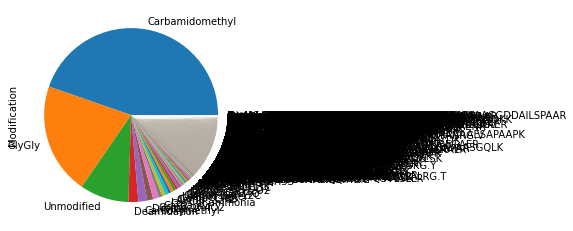

In [50]:
writeDPpng=pathFiles/(fileName+"DP.png")
if(dfDPcnt.empty==False): dfDPcnt[dfDPcnt>0].plot(kind='pie').figure.savefig(writeDPpng.absolute(),dpi=100,bbox_inches = "tight")

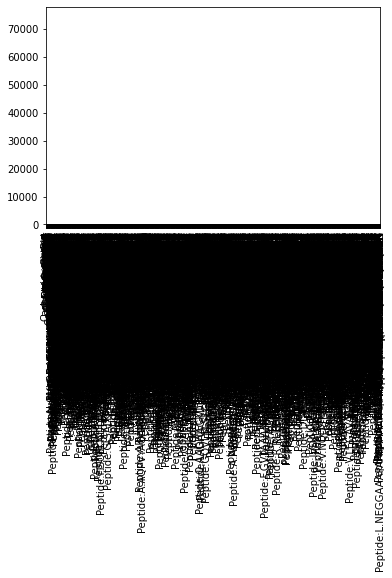

In [51]:
if(dfDPcnt.empty==False): dfDPcnt[dfDPcnt>0].plot(kind='bar',stacked=True).figure.savefig(writeDPpng.absolute(),dpi=100,bbox_inches = "tight")

In [40]:
plt.close()
print(writeDPpng)
unmodCnt=dfDP[dfDP['Modification']=='Unmodified']#unmodified count(s)
unmodCnt=unmodCnt['Base Raw File'].value_counts()
unmodCnt.index=unmodCnt.keys().str.split("_").str[-1]
dfDPcnt=dfDP['Modification'].value_counts().keys()
for i in range(10):
    modName=dfDPcnt[i]
    print(modName)
    writeDPpng=pathFiles/(fileName+"DP.png")
    dfDPmod=dfDP[dfDP['Modification']==modName]
    dfDPmod=dfDPmod['Base Raw File'].value_counts()
    dfDPmod.index=dfDPmod.keys().str.split("_").str[-1]
    print(modName,dfDPmod,(dfDPmod/unmodCnt))
    writeDPcsv=pathFiles/(fileName+modName+"DP.csv")
    dfDPmod.to_csv(writeDPcsv)
    print(writeDPcsv)
    writeDPpng=pathFiles/(fileName+modName+"DP.png")
    dfDPmod.plot(kind='pie').figure.savefig(writeDPpng.absolute(),dpi=100,bbox_inches = "tight")
    plt.close()
    print(writeDPpng)


/home/ash022/scripts/git/mqpar.xml.1605104658.results/allPeptides.txtDP.png
Carbamidomethyl
Carbamidomethyl 54B.raw               1090
2B.raw                 773
66B.raw                575
3B.raw                 489
53B.raw                414
4B.raw                 351
52B.raw                316
26B.raw                312
1B.raw                 308
15B.raw                286
17B.raw                240
20201111084632.raw     207
5B.raw                 194
40B.raw                183
30B.raw                174
28B.raw                157
29B.raw                138
42B.raw                128
16B.raw                125
65B.raw                109
27B.raw                107
39B.raw                 66
64B.raw                 46
41B.raw                 10
55B.raw                  9
14B.raw                  8
20201111003132.raw       2
Name: Base Raw File, dtype: int64 14B.raw               1.000000
15B.raw               2.200000
16B.raw               1.953125
17B.raw               1.983471
1B.ra